In [1]:
#Import relevant modules
import numpy as np

In [2]:
#Input data: edge by edge flows as a vector
num_edges = 100

#Store the UE and SO solutions
x_UE_sol = 2*np.ones((1, num_edges))
y_SO_sol = np.ones((1, num_edges))

#Define the link latency functions
def f_j(num_people):
    '''Calculates latency of link'''
    return num_people*10

#Calculate for each value of alpha the corresponding travel time
total_tt = []
alpha_vals = np.linspace(0, 1, 100)
for i in alpha_vals:
    convex_comb = i*x_UE_sol + (1-i)*y_SO_sol
    total_tt_alpha = sum([j*f_j(j) for j in convex_comb][0])
    total_tt.append(total_tt_alpha)

In [23]:
def get_travel_time(sol_implement):
    '''Find the total travel time in a given network'''
    
    return sum([j*f_j(j) for j in sol_implement][0])

def beta_calc(OD_dict, convex_comb):
    '''Calculate beta for a given alpha value'''
    
    beta_val = []
    for OD_pair in OD_dict:
        path_OD = []
        for path in OD_dict[OD_pair]:
            path_tt = 0
            for edge in path:
                path_tt += convex_comb[0][edge]

            path_OD.append(path_tt)

        #Store max and min paths per OD pair
        path_OD_max = max(path_OD)
        path_OD_min = min(path_OD)

        #Find ratio of max and min
        path_OD_beta = path_OD_max/path_OD_min
        beta_val.append(path_OD_beta)

    #Find maximum value of beta for this value of alpha
    beta = max(beta_val)
    
    return beta

def dict_union(dict_UE, dict_SO):
    '''Find the union of two dictionaries'''
    dict_total = dict_UE
    for OD_pair in dict_SO:
        a = dict_total[OD_pair]
        for j in dict_SO[OD_pair]:
            if j not in dict_UE[OD_pair]:
                a.append(j)
                
        dict_total[OD_pair] = a
        
    return dict_total

In [25]:
#Input Data on vector of edges for each path for each OD pair
OD_dict_UE = {1: [[1, 2, 5], [1, 3, 5]], 2: [[4, 2, 5], [3, 2, 5]]}
OD_dict_SO = {1: [[1, 2, 5], [1, 4, 5]], 2: [[4, 2, 5], [3, 4, 5]]}

#Take the union of the two dictionaries to find total set of OD pairs
OD_dict = dict_union(OD_dict_UE, OD_dict_SO)

#Calculate for each value of alpha the corresponding travel time
total_tt = []
beta_alpha = []
alpha_vals = np.linspace(0, 1, 100)
for i in alpha_vals:
    convex_comb = i*x_UE_sol + (1-i)*y_SO_sol
    total_tt_alpha = get_travel_time(convex_comb)
    total_tt.append(total_tt_alpha)
    
    #If at extremes then calculate beta according to UE and SO solutions respectively
    if i == 0:
        beta = beta_calc(OD_dict_SO, convex_comb)
    elif i == 1:
        beta = beta_calc(OD_dict_UE, convex_comb)
    else:
        beta = beta_calc(OD_dict, convex_comb)
    
    beta_alpha.append(beta)

Text(0, 0.5, '$\\beta$')

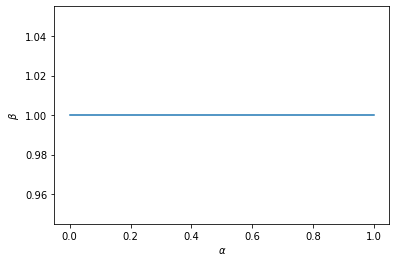

In [27]:
import matplotlib.pyplot as plt

plt.plot(alpha_vals, beta_alpha)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')